In [34]:
import json
from matplotlib import pyplot as plt
import datetime as dt
import pandas as pd
import seaborn as sns
import sys
sys.path.insert(1,r'C:\Users\samga\OneDrive\Desktop\Charts')
import SGCharts
from distinctipy import distinctipy
import numpy as np

# Data Collection

In [9]:
#path = 'SG_Graph_Data/new_defaul.json'
#path = 'SG_Graph_Data/Regual_RMVO.json' #<--------- AL 6 MODELS
#path = 'SG_Graph_Data/Old_MVO.json'
#path = 'SG_Graph_Data/All_Data2.json'
path = 'results-big_test.json'
#OneDrive/Capstone/msf-capstone-kelvin-sam-rafay/SG_Graph_Data/results-big_test.json

with open(path) as json_file:
    data = json.load(json_file)
    
model = list(data.keys())[1:]

# Holdings Graph

#### Finding Index of Specific Prediction

In [218]:
mw = 0.8
lambd = 5
pred = 'Price MA'
opt = 'MVO'
alpha = 0
cvarmethod = 'na'

chosen = 'mw_{}_lambda_{}_pred_{}_opt_{}_alpha_{}_cvarmethod_{}'.format(mw,lambd,pred,opt,alpha,cvarmethod)
ind = model.index(chosen)
print(ind)

110


### Holding Graph
- top models are the selected models

<Figure size 640x480 with 0 Axes>

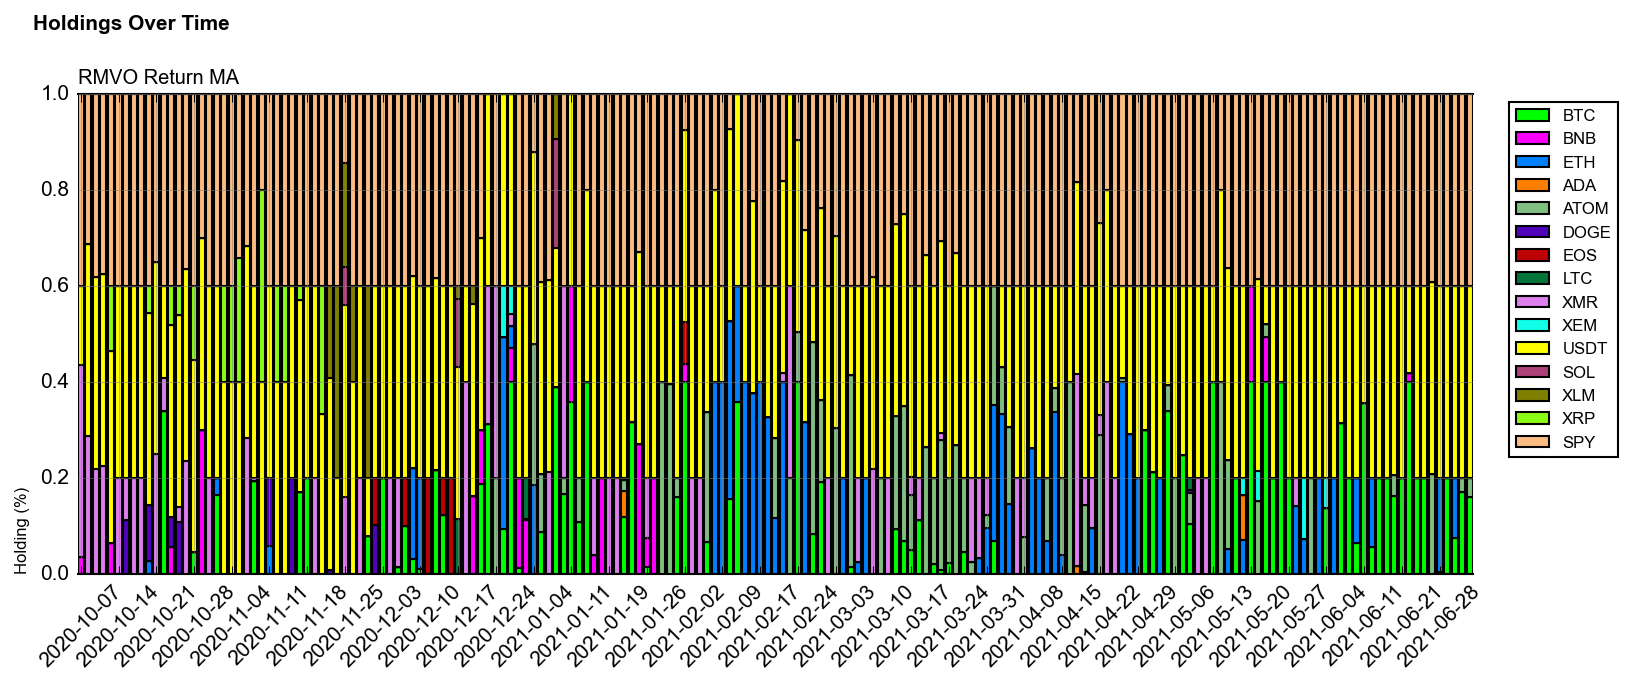

In [322]:
top_models = ['mw_0.4_lambda_100_pred_Price MA_opt_RMVO_alpha_0_cvarmethod_na',
             'mw_0.4_lambda_50_pred_Factor Model_opt_RMVO_alpha_0_cvarmethod_na',
              'mw_0.2_lambda_100_pred_Decision Tree_opt_RMVO_alpha_0_cvarmethod_na',
              'mw_1.0_lambda_0_pred_na_opt_cvar_alpha_0.01_cvarmethod_ARIMA-GARCH',
              'mw_1.0_lambda_0_pred_na_opt_cvar_alpha_0.01_cvarmethod_Historical',
              'mw_1.0_lambda_0_pred_na_opt_cvar_alpha_0.01_cvarmethod_Normal']
model_names = ['RMVO Return MA','RMVO Factor Model','RMVO Decision Tree','CVar ARIMA-GARCH','CVAR Historical','CVAR Normal']
name_count = 0
clrs = distinctipy.get_colors(18)
clrs = saved_colors
for data_factor in top_models[1:2]:
    dates = list(data[data_factor].keys())
    assets = list(data[data_factor][dates[2]]['holdings'].keys())

    #accum = []
    #for date in dates:
    #    holding = data[data_factor][date]['holdings'][stock]
    #    accum = accum + [holding]

    ch = SGCharts.Chart('Holdings Over Time',figsize=[12,4])

    

    color_cnt = 0
    old = [0]*len(dates)
    for stock in assets:
        accum = []
        for date in dates:
            #print(stock)
            #print(date)
            holding = data[data_factor][date]['holdings'][stock]
            accum = accum + [holding]
        ch.ax.bar(dates,accum,bottom=old,color = clrs[color_cnt],label=stock)
        old = [x+y for x,y in zip(old,accum)]
        color_cnt = color_cnt + 1

    xticks = []
    for i in range(0,len(dates),5):
        xticks = xticks + [dates[i]]

    ch.ax.set_xticks(xticks)
    ch.rotate_xticks(45)
    ch.ax.set_title(model_names[name_count])
    ch.ax.set_ylabel('Holding (%)')
    ch.render(spines=['top','bottom'],legend_columns=8)
    ch.ax.legend(bbox_to_anchor=(1.11,1))
    name_count = name_count + 1
    #ch.fig.savefig('Graph_Plots/Holdings {model}.png'.format(model=data_factor),bbox_inches="tight")
saved_colors = clrs

# PnL Graphs

'Returns-over-Time.png'

<Figure size 640x480 with 0 Axes>

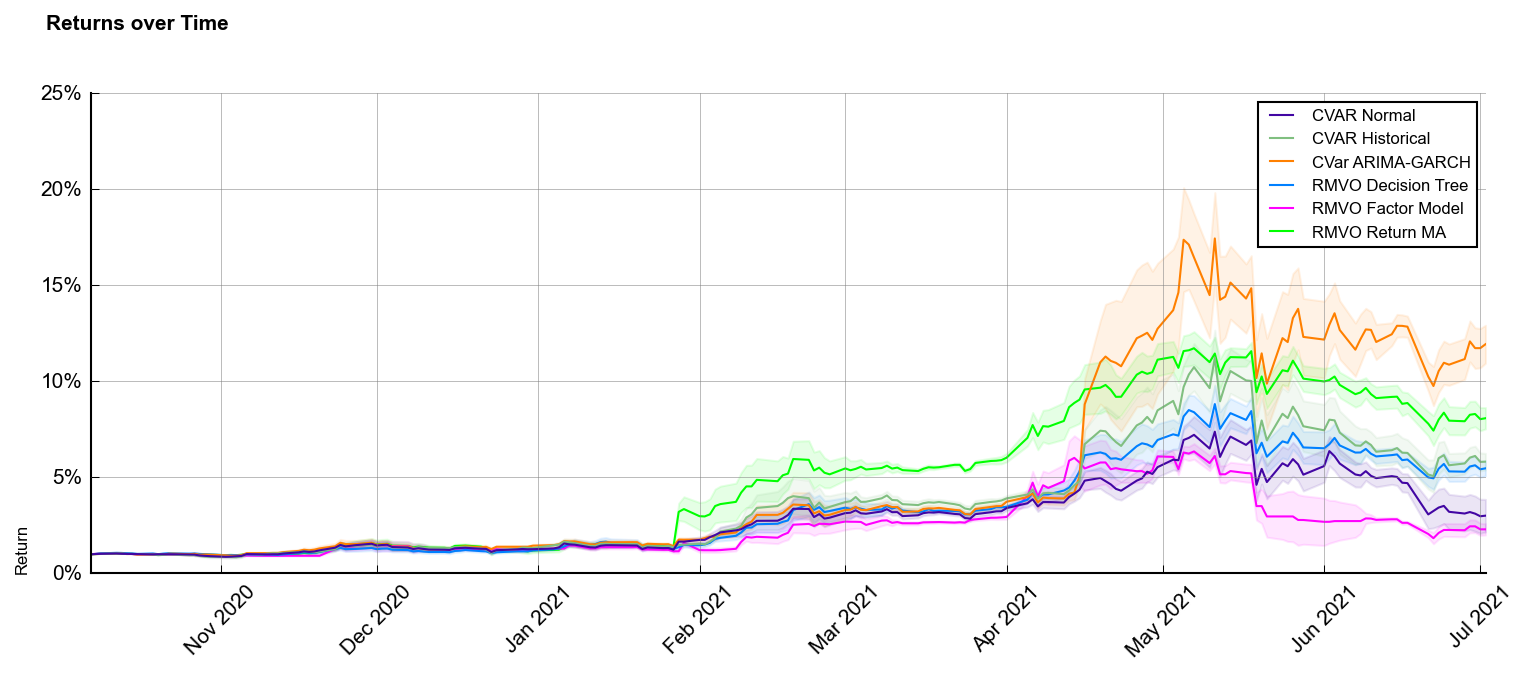

In [327]:
import matplotlib.ticker as mtick
top_models = ['mw_0.4_lambda_100_pred_Price MA_opt_RMVO_alpha_0_cvarmethod_na',
             'mw_1.0_lambda_50_pred_Factor Model_opt_RMVO_alpha_0_cvarmethod_na',
              'mw_0.2_lambda_100_pred_Decision Tree_opt_RMVO_alpha_0_cvarmethod_na',
              'mw_1.0_lambda_0_pred_na_opt_cvar_alpha_0.01_cvarmethod_ARIMA-GARCH',
              'mw_1.0_lambda_0_pred_na_opt_cvar_alpha_0.01_cvarmethod_Historical',
              'mw_1.0_lambda_0_pred_na_opt_cvar_alpha_0.01_cvarmethod_Normal']
model_names = ['RMVO Return MA','RMVO Factor Model','RMVO Decision Tree','CVar ARIMA-GARCH','CVAR Historical','CVAR Normal']
#model_names = ['RMVO Factor Model','RMVO Decision Tree','CVar ARIMA-GARCH','CVAR Historical','CVAR Normal']

name_count = 0
ch = SGCharts.Chart('Returns over Time',figsize=[12,4])

clrs = distinctipy.get_colors(10)
count = 0


data_factor = 'PriceMA'

#for data_factor in [model[110],model[21],model[144],model[189],model[200],model[225]][0:1]:
#for data_factor in [model[21],model[144],model[189],model[200],model[225]]:
for data_factor in top_models:
    
    dates = list(data[data_factor].keys())
    accum = []
    for date in dates:
        accum = accum + [data[data_factor][date]['pnl']]

    
    df = pd.DataFrame(accum,dates,columns=['AUM']).reset_index()
    df['date'] = pd.to_datetime(df['index'])
    #df = df[df.date<'2021-02-07']
    
    #df = pd.DataFrame(accum,dates,columns=['AUM'])
    initial_val = df['AUM'].iloc[0]
    df['Returns'] = ((df['AUM']/initial_val))
    df['Vol'] = df['Returns'].rolling(15).std()
    #df = df.dropna()
    #display(df.head(2))

    #dates_dt = [dt.datetime.strptime(x,'%Y-%m-%d') for x in df.index]
    #print(df['date'])
    ch.ax.plot(df['date'],df['Returns'],color=clrs[count],label=model_names[name_count])
    ch.ax.fill_between(df['date'],df['Returns']-df['Vol'],df['Returns']+df['Vol'],color=clrs[count],alpha=0.1)
    name_count = name_count + 1

    count = count + 1
#ch.ax.plot(dates_dt,df['Returns']-df['Vol'],color=SGCharts.colors['nbf_blue2'])
# --------------------------------------------------------

ch.ax.set_ylabel('Return')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ch.ax.yaxis.set_major_formatter(yticks)
ch.rotate_xticks(45)

#ch.ax.set_title('Sharpe of Normal: 1.795')
#ch.ax.set_xlim([df['date'].iloc[60],df['date'].iloc[-1]])

ch.render(spines=['left','bottom'])

# Sharpe

In [328]:
from tqdm import tqdm
dfs = []
count = 0
for i in tqdm(range(0,len(model))):
    data_factor = model[i]
    accum = []
    dates = list(data[data_factor].keys())
    for date in dates:
        accum = accum + [data[data_factor][date]['pnl']]
    if model == 'default-pricema-robustmvo-':
        dfs = dfs + [pd.DataFrame({'Date':date,'{}'.format(data_factor):accum})]
    else:
        dfs = dfs + [pd.DataFrame({'{}'.format(data_factor):accum})]

df = pd.concat(dfs,axis=1)#.dropna()

100%|██████████████████████████████████████████████████████████████████████████████| 228/228 [00:00<00:00, 2518.58it/s]


In [329]:
for mod in model:
    df['return {}'.format(mod)] = df[mod]/1000000

sharpes = []
returns = []
stds = []
for mod in model:
    try:
        #print(mod)
        sharpe = df['return {}'.format(mod)].iloc[-1]/df['return {}'.format(mod)].std()
        #print
        #if sharpe == 'nan':
        #    d = '13' + 12
        sharpes = sharpes + [sharpe]
        returns = returns + [df['return {}'.format(mod)].iloc[-1]]
        stds = stds + [df['return {}'.format(mod)].std()]
        #print('Sharpe of {mod} is {sharpe}'.format(mod=mod,sharpe=str(sharpe)))
        #print('Return of {mod} is ')
    except:
        print('here')
        sharpes = sharpes + [1.9739]
        returns = returns + [0.0265]
        stds = stds + [0.01345]

C:\Users\samga\AppData\Local\Temp\ipykernel_40924\365327594.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['return {}'.format(mod)] = df[mod]/1000000
C:\Users\samga\AppData\Local\Temp\ipykernel_40924\365327594.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['return {}'.format(mod)] = df[mod]/1000000
C:\Users\samga\AppData\Local\Temp\ipykernel_40924\365327594.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

### DF (res) of all Results

In [330]:
res = pd.DataFrame({'Model':model,'Sharpe':sharpes,'Return':returns,'Std':stds}).sort_values(by='Sharpe',ascending=False)

### Sharpe Bar Graph
- After finding the top results, manually input the sharpes

'Sharpe-Ratio.png'

<Figure size 640x480 with 0 Axes>

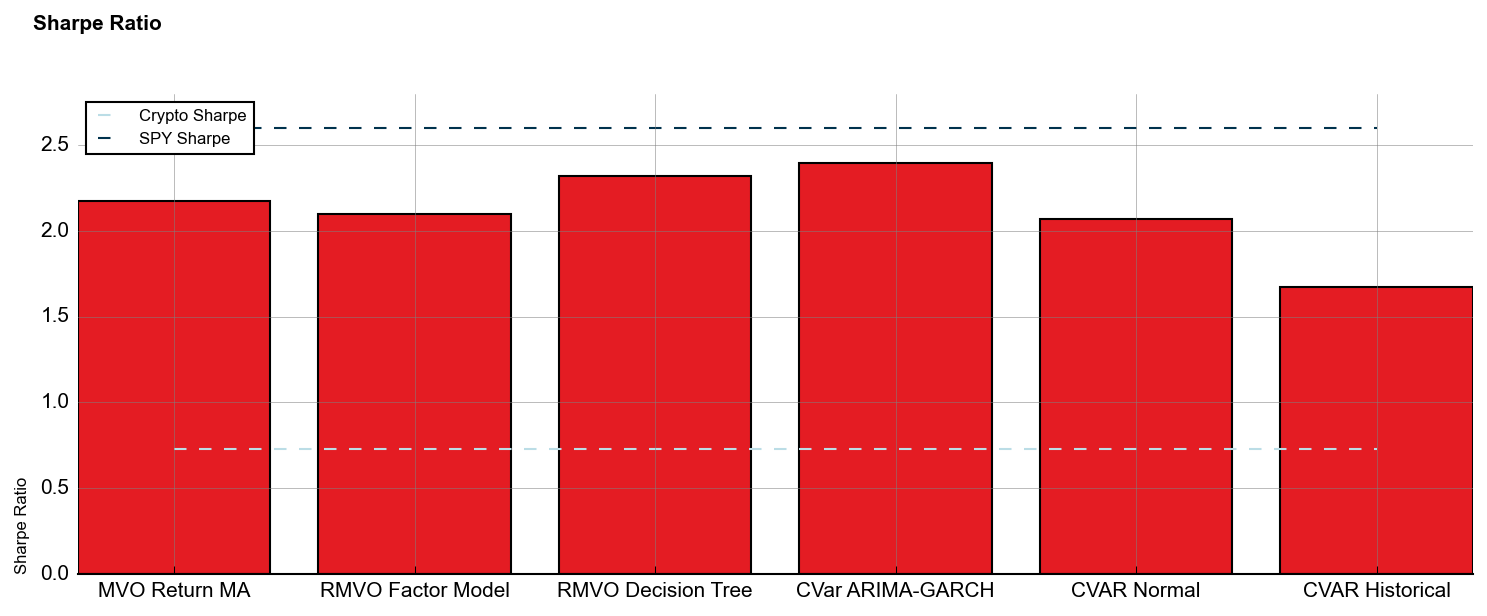

In [321]:
ch = SGCharts.Chart('Sharpe Ratio',figsize=[12,4])

names = [x.replace('default-','').replace('-', ' ') for x in model]

names = ['MVO Return MA','RMVO Factor Model','RMVO Decision Tree','CVar ARIMA-GARCH','CVAR Normal','CVAR Historical']
top_sharpes = [2.175,2.099,2.320,2.396,2.068,1.673]

ch.ax.bar(names,top_sharpes,color=SGCharts.colors['nbf_red'])

ch.ax.plot(names,[2.6]*len(names),color=SGCharts.colors['nbf_blue'],linestyle='--',label='SPY Sharpe')
ch.ax.plot(names,[0.73]*len(names),color=SGCharts.colors['nbf_blue2'],linestyle='--',label='Crypto Sharpe')

#ch.rotate_xticks(45)

ch.ax.set_ylabel('Sharpe Ratio')

ch.ax.set_ylim([0,2.8])

ch.render(spines=['bottom'],loc='upper left')